In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
eps = 0.000001
data = np.array([0.012189092,	0.000836,	0.000708,	0.0000134,	0.003683158,	0.012313264,	0.014506693,	0.014560816,	0.011660093,	0.014383987,	0.014540713,	0.01095759,	0.000172,	0.012471503,	0.014549885,	0.00358868,	0.003005411,	0.008731469,	0.008432049,	0.014563335,	0.002133413,	0.001672443,	0.006216613,	0.00306785,	0.014485338,	0.002993782,	0.014114919,	0.014218961,	0.014508285,	0.004951977,	0.011576424,	0.009330315,	0.014560351,	0.003345492,	0.014562799,	0.014563212,	0.014558314,	0.011756225,	0.005631821,	0.014563261,	0.006217812,	0.002446918,	0.014516566,	0.014402356,	0.014563356,	0.014439132,	0.0003,	0.014308892,	0.013254674,	0.002987762,	0.014548334,	0.014390936,	0.014498479,	0.009713626,	0.013863024,	0.014563367,	0.014563167,	0.006825383,	0.002103993,	0.014563119,	0.002343343,	0.0000787,	0.014563342,	0.006454483,	0.014561299,	0.009397756,	0.003571348,	0.012654194,	0.002987136,	0.014196857,	0.010354826,	0.014474465,	0.014562533,	0.014521865,	0.008030334,	0.014563182,	0.00895547,	0.01152541,	0.014548613,	0.014541243,	0.014561206,	0.012069181,	0.01220905,	0.011818605,	0.014493132,	0.000219,	0.000000335,	0.002569901,	0.014563287,	0.000919,	0.008538002,	0.010274634,	0.003064117,	0.010341366,	0.014561517,	0.002992252,	0.013987906,	0.014168899,	0.01451498,	0.011577997,	0.001800333,	0.013575334,	0.0000185,	0.014563339,	0.012206023,	0.005304583,	0.014563362,	0.00472693,	0.01151021,	0.012843856,	0.007760848,	0.000815,	0.008404639,	0.0000251,	0.014561052,	0.002087466,	0.011578828,	0.0000755,	0.002740682,	0.013586152,	0.013085444,	0.003189073,	0.014563119,	0.011322467,	0.011576489,	0.011424139,	0.008016134,	0.007007776,	0.011270593,	0.014378912,	0.01441797,	0.007898851,	0.010172003,	0.014511191,	0.01456023,	0.011394382,	0.01456332,	0.002913245,	0.00071,	0.003040186,	0.01420521,	0.010495542,	0.011991869,	0.004481137,	0.014383781,	0.014114903,	0.005636875,	0.011651188,	0.005962354,	0.014563361,	0.014553987,	0.014563364,	0.01445646,	0.01455803,	0.013996998,	0.011214427,	0.003378323,	0.010632521,	0.014563038,	0.013288408,	0.014446417,	0.014563351,	0.011576827,	0.011789202,	0.001081422,	0.012300185,	0.014563367,	0.014207422,	0.014563335,	0.007098768,	0.01179491,	0.014510934,	0.014167271,	0.014563356,	0.011658909,	0.01456313,	0.014540652,	0.014561897,	0.014550003,	0.008498368,	0.0113924,	0.0000000819,	0.013091385,	0.003046782,	0.0000109,	0.002987341,	0.000142,	0.012235321,	0.011576769,	0.0000418,	0.003022424,	0.005446526,	0.0000238,	0.003791199,	0.013473333,	0.014409561,	0.014582059,	0.014459575,	0.014239706,	0.014563217])

Merge stuff

In [3]:
l = min(data)
u = max(data)

traces = pd.DataFrame({"L0":[np.sqrt(((l - min(data[0:n])) ** 2 + (u - max(data[0:n])) ** 2) / 2) / (u - l) for n in range(1,len(data)) ]})
for i in range(30):
    random.shuffle(data)
    traces[f"L{i+1}"] = [np.sqrt(((l - min(data[0:n])) ** 2 + (u - max(data[0:n])) ** 2) / 2) / (u - l) for n in range(1,len(data)) ]


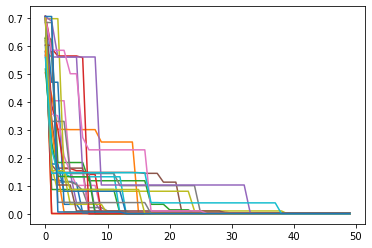

In [6]:
plt.plot(traces.iloc[:50,:])

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import beta as beta_dist
from scipy.special import hyp2f1
from scipy.special import beta as beta_func
from scipy.integrate import dblquad
import utils
import re
from functools import partial

In [5]:
def fit(data, n, astar, bstar, eps=0.00001) :
    samples = data[range(n)]
    
    pos = astar - eps
    scale = bstar - astar + 2 * eps
    params = beta_dist.fit(samples, floc = pos, fscale = scale)
        
    return params[0:2]

In [6]:
def _p_beta2(x, y, L, alpha, beta, n):
    return ((
        (L + x) ** alpha *  hyp2f1(alpha, 1 - beta, alpha + 1, (L + x) / (L + x + y)) -
         x ** alpha * hyp2f1(alpha, 1 - beta, alpha + 1, x / (L + x + y))
    ) / (
        alpha * (L + x + y) ** alpha * beta_func(alpha, beta) 
    )) ** n
    

def p_beta(data, n, a, b, astar, bstar,  delta=0.05):
    alpha, beta = fit(data, n, astar, bstar)
    L = b - a
    
    f = partial(_p_beta2, L = L, alpha = alpha, beta = beta, n = n)

    num, e1 = dblquad(f, 0, delta / 2, lambda x: 0, lambda x: delta / 2, epsabs=1e-30 )
    den, e2 = dblquad(f, 0,  a + (1 - b), lambda x: 0, lambda x: a + (1 - b) - x, epsabs=1e-30)
    
    return [num/den, num, den, e1, e2]

def p_unif(data, n, a, b, delta=0.05):
    L = b - a
    eps = delta / (2*L)
    return (1 + (1 + 2*eps)**(2 - n) - 2 * (1 + eps) ** (2-n)) / (1 - L ** (n - 2) - (n - 2) * (1 - L) * L ** (n - 2))

In [7]:
a = min(data)
b = max(data)

In [8]:
(b-a)/10 

0.0014581977099999998

n 3
n 4
n 5
n 6
n 7
n 8
n 9
n 10
n 11
n 12
n 13
n 14
n 15


/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


n 16
n 17
n 18
n 19
n 20
n 21
n 22
n 23
n 24
n 25
n 26
n 27
n 28
n 29
n 30
n 31
n 32
n 33
n 34
n 35
n 36
n 37
n 38
n 39


/Users/dhuber/anaconda3/envs/causal/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


n 40
n 41
n 42
n 43
n 44
n 45
n 46
n 47
n 48
n 49
n 50
n 51
n 52
n 53
n 54
n 55
n 56
n 57
n 58
n 59
n 60
n 61
n 62
n 63
n 64
n 65
n 66
n 67
n 68
n 69
n 70
n 71
n 72
n 73
n 74
n 75
n 76
n 77
n 78
n 79
n 80
n 81
n 82
n 83
n 84
n 85
n 86
n 87
n 88
n 89
n 90
n 91
n 92
n 93
n 94
n 95
n 96
n 97
n 98
n 99
n 100
n 101
n 102
n 103
n 104
n 105
n 106
n 107
n 108
n 109
n 110
n 111
n 112
n 113
n 114
n 115
n 116
n 117
n 118
n 119
n 120
n 121
n 122
n 123
n 124
n 125
n 126
n 127
n 128
n 129
n 130
n 131
n 132
n 133
n 134
n 135
n 136
n 137
n 138
n 139
n 140
n 141
n 142
n 143
n 144
n 145
n 146
n 147
n 148
n 149
n 150
n 151
n 152
n 153
n 154
n 155
n 156
n 157
n 158
n 159
n 160
n 161
n 162
n 163
n 164
n 165
n 166
n 167
n 168
n 169
n 170
n 171
n 172
n 173
n 174
n 175
n 176
n 177
n 178
n 179
n 180
n 181
n 182
n 183
n 184
n 185
n 186
n 187
n 188
n 189
n 190
n 191
n 192
n 193
n 194
n 195
n 196
n 197
n 198
n 199


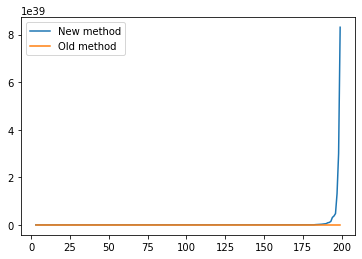

In [9]:
delta = (b-a)/10

r_beta = list()
r_unif = list()

upper = 200
for n in range(3, upper):
    rbeta1 = p_beta(data, n, a, b, a, b, delta=delta)
    runif1 = p_unif(data, n, a, b,  delta=delta)
   

    r_beta.append(rbeta1)
    r_unif.append(runif1)
    print("n",n)



plt.figure()
plt.plot(range(3,upper),np.array(r_beta)[:,0], label="New method")
plt.plot(range(3,upper),np.array(r_unif), label="Old method")
plt.legend()


In [28]:
c = pd.DataFrame(r_beta, columns=["p","num","den","e1","e2"])
c["unif"] = r_unif
c

,p,num,den,e1,e2,unif
0,2.535134e-03,2.441035e-07,9.628821e-05,2.825178e-12,5.023840e-10,0.004458
1,4.909591e-03,1.133037e-07,2.307803e-05,8.540993e-12,3.133660e-10,0.012395
2,2.301145e-02,1.114568e-07,4.843535e-06,9.757820e-16,1.021004e-10,0.023640
3,3.215205e-02,5.576714e-08,1.734482e-06,5.891555e-16,6.340352e-11,0.037609
4,3.989076e-02,2.923405e-08,7.328526e-07,5.921912e-16,6.700813e-11,0.053869
...,...,...,...,...,...,...
192,3.727130e+38,9.451462e-14,2.535855e-52,6.482598e-14,1.750089e-49,0.999837
193,4.762455e+38,9.822746e-14,2.062538e-52,8.828774e-14,1.423436e-49,0.999845
194,1.317411e+39,8.980037e-14,6.816429e-53,6.004371e-14,4.704275e-50,0.999852
195,2.998765e+39,8.493634e-14,2.832377e-53,6.798320e-14,1.954730e-50,0.999859


In [29]:
c.to_csv("P_new_perl_n80_delta10percent.csv")

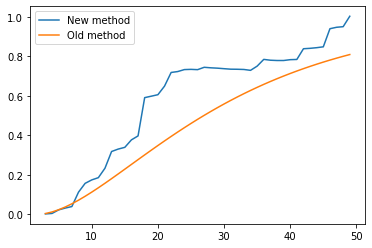

In [10]:

r = range(3, 50)
plt.figure()
plt.plot(r,np.array(r_beta)[:len(r),0], label="New method")
plt.plot(r,np.array(r_unif)[:len(r)], label="Old method")
plt.legend()


In [36]:
out.to_csv("interval_new_vs_old_0.01_0.05_0.075.csv")


In [21]:
rbeta1 = p_beta(data, 10, a, b, a, b, delta=delta)
rbeta2 = p_beta(data, 10, a, b, a, b, delta=delta)
rbeta1[0] == rbeta2[0]

True

In [22]:
rbeta1[0] == rbeta2[0]

True

In [20]:
rbeta1

[8.305555938786087e+39,
 7.775923371947304e-14,
 9.362315333564303e-54,
 7.128599807345627e-14,
 6.461286865328339e-51]